In [1]:
!pip install mlflow
!pip install xgboost

In [2]:
# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model imports
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import absolute
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import shap
shap.initjs()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import mlflow

# Pipelining and transforms
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Get current year
import datetime


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df_train = pd.read_csv('/Users/eugene/Desktop/DS Projects/DatiumTest.rpt', delimiter = '\t')
df_test = pd.read_csv('/Users/eugene/Desktop/DS Projects/DatiumTest.rpt', delimiter = '\t')

Columns (27,91) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (27,91) have mixed types. Specify dtype option on import or set low_memory=False.


In [4]:
df_train.describe()

,YearGroup,MonthGroup,SequenceNum,GearNum,DoorNum,EngineSize,Cylinders,FuelCapacity,GrossCombinationMAss,GrossVehicleMass,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMFrom,PowerRPMTo,Torque,TorqueRPMFrom,TorqueRPMTo,RonRating,SeatCapacity,ValvesCylinder,Acceleration,TowingBrakes,TowingNoBrakes,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,AltEngAmpHours,AltEngVolts,AltEngPower,AltEngPowerFrom,AltEngPowerTo,AltEngTorque,AltEngTorqueFrom,AltEngTorqueTo,NormalChargeMins,QuickChargeMins,QuickChargeVoltage,KMRangeElectricEng,TopSpeedElectricEng,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,AncapRating,AverageKM,GoodKM,AvgWholesale,AvgRetail,GoodWholesale,GoodRetail,TradeMin,TradeMax,PrivateMax,NewPrice,Age_Comp_Months,KM,Sold_Amount
count,11488.000000,11488.000000,11488.000000,11479.000000,11488.000000,11488.000000,11488.000000,11473.000000,5765.000000,8155.000000,11484.000000,11475.000000,11470.000000,11478.000000,10362.000000,9945.000000,7378.000000,11484.000000,340.00000,11484.000000,11485.000000,3002.000000,11476.000000,7350.000000,11488.000000,11484.000000,2340.000000,10969.000000,10861.000000,11474.000000,11452.000000,9729.000000,8951.000000,11166.000000,0.0,300.000000,297.000000,2.0,12.000000,250.000000,0.0,2.0,2.0,0.0,0.0,9.000000,7.0,8784.000000,8784.000000,8877.000000,11160.000000,8741.000000,8741.000000,9736.000000,9723.000000,11326.000000,9496.000000,11473.000000,11473.000000,11435.000000,11470.000000,11463.00000,11474.000000,11435.000000,11435.000000,11474.000000,11487.000000,11472.000000,11485.000000,11488.000000
mean,2012.455780,1.573381,9.658948,5.444290,4.303534,2600.262709,4.558670,70.014469,4489.525412,2443.639240,2824.506792,1633.228932,4770.731648,1828.318261,1661.981664,1602.983509,761.278666,135.253649,4260.00000,5209.957332,297.796256,1703.602598,3432.258627,91.559456,4.966052,3.940352,9.024188,1843.359559,666.495719,3.240370,85279.253842,7821.821359,5.596693,9.002149,NaN,603.428000,88.507071,1200.0,10090.000000,259.820000,NaN,1200.0,300.0,NaN,NaN,40.333333,120.0,6.155908,6.035804,3.504844,204.323566,258.090951,159.977577,10.825555,6.668970,8.415107,4.729781,120.475464,75.205700,16151.491036,19755.945946,18218.99590,22102.161408,14413.790993,16646.716222,20208.070420,38556.556281,48.728208,84309.869221,18142.115396
std,2.839785,2.958877,10.969166,1.285995,0.842553,814.042753,1.027457,20.518968,1207.836570,518.966775,218.176504,188.562396,353.657079,71.609306,311.678443,307.174628,288.105614,39.631556,727.34414,1173.931219,103.652348,688.638812,977.502870,1.550858,1.281443,0.341623,1.616163,755.226733,130.115960,0.655456,40878.853197,5305.678451,3.638436,2.663985,NaN,111.961736,26.607924,0.0,5143.804747,35.727938,NaN,0.0,0.0,NaN,NaN,6.614378,0.0,1.114335,1.956823,0.796376,44.965497,60.220192,33.391666,2.678084,1.340186,1.872879,0.562906,74.686106,47.905726,9494.004244,10841.686181,10128.48707,11585.458439,8877.846594,9547.215572,10719.143841,16058.132732,41.862017,60627.002253,11392.162124
min,1962.000000,0.000000,0.000000,1.000000,2.000000,698.000000,2.000000,33.000000,1450.000000,990.000000,1812.000000,1230.000000,2500.000000,1515.000000,730.000000,730.000000,260.000000,45.000000,2500.00000,3000.000000,90.000000,1200.000000,1200.000000,91.000000,2.000000,2.000000,3.800000,200.000000,100.000000,2.000000,-1.000000,1000.000000,1.000000,3.000000,NaN,144.000000,15.000000,1200.0,1540.000000,89.000000,NaN,1200.0,300.0,NaN,NaN,37.000000,120.0,2.000000,0.500000,1.000000,44.000000,78.000000,82.000000,3.400000,3.500000,1.900000,1.000000,20.000000,10.000000,600.000000,1550.000000,850.00000,2300.000000,400.000000,1900.000000,2100.000000,2478.000000,0.000000,2.000000,185.000000
25%,2011.000000,0.000000,1.000000,5.000000,4.000000,1997.000000,4.000000,60.000000,3300.000000,2070.000000,2660.000000,1471.000000,4580.000000,1778.000000,1465.000000,1420.000000,525.000000,110.000000,3500.

In [5]:
# Rough Preprocessing columns
print ('Size of original train dataset', df_train.shape)
df_train_clean = df_train.copy()

df_train_clean.drop(['AvgWholesale', 'AvgRetail', 'GoodWholesale', 'GoodRetail', 'TradeMin', 'TradeMax', 'PrivateMax'], axis=1, inplace=True) # Columns to not use
df_train_clean.drop(['Compliance_Date', 'Sold_Date', 'NewPrice', 'Colour'], axis=1, inplace=True)
print ('Drop columns with custom cols removed', df_train_clean.shape)
df_train_clean.dropna(thresh=3446,axis=1, inplace=True) # Drop Columns with 70% empty NaNs. 11488*30% = 3446 at least to survive. This will bring 123 cols to 93

print ('Drop columns with more than 70% NaN', df_train_clean.shape)


Size of original train dataset (11488, 130)
Drop columns with custom cols removed (11488, 119)
Drop columns with more than 70% NaN (11488, 89)


In [6]:
df_train_clean.head()

,Make,Model,MakeCode,FamilyCode,YearGroup,MonthGroup,SequenceNum,Description,CurrentRelease,ImportFlag,LimitedEdition,Series,SeriesModelYear,BadgeDescription,BodyStyleDescription,DriveDescription,DriveCode,GearTypeDescription,GearLocationDescription,GearNum,DoorNum,EngineSize,EngineDescription,Cylinders,FuelTypeDescription,InductionDescription,OptionCategory,CamDescription,EngineTypeDescription,FuelCapacity,FuelDeliveryDescription,MethodOfDeliveryDescription,GrossCombinationMAss,GrossVehicleMass,VIN,WheelBase,Height,Length,Width,KerbWeight,TareMass,PayLoad,Power,PowerRPMTo,Torque,TorqueRPMTo,RonRating,SeatCapacity,ModelCode,BuildCountryOriginDescription,ValvesCylinder,EngineCycleDescription,EngineConfigurationDescription,EngineLocation,EngineNum,FrontTyreSize,RearTyreSize,FrontRimDesc,RearRimDesc,TowingBrakes,TowingNoBrakes,WarrantyCustAssist,WarrantyYears,WarrantyKM,FirstServiceKM,FirstServiceMonths,RegServiceMonths,GreenhouseRating,AirpollutionRating,OverallGreenStarRating,CO2Combined,CO2Urban,CO2ExtraUrban,FuelUrban,FuelExtraurban,FuelCombined,EmissionStandard,AncapRating,VFactsClass,VFactsSegment,VFactsPrice,IsPPlateApproved,AverageKM,GoodKM,Branch,SaleCategory,Age_Comp_Months,KM,Sold_Amount
0,Ford,Ranger,FORD,RANGER,2014,0,4,PX XL Hi-Rider Cab Chassis Single Cab 2dr Spts...,F,L,F,PX,NaN,XL,Cab Chassis,Rear Wheel Drive,RWD,Sports Automatic,Floor,6.0,2,2198,2.2,4,Diesel,Turbo Intercooled,CC,Double Overhead Cam,Piston,80.0,Direct Injection,Electronic Sequential,6000.0,3200.0,MNAUMAF80C*######,3220.0,1800.0,5110.0,1850.0,1686.0,NaN,1514.0,110.0,3700.0,375.0,2500.0,NaN,2,iTDX9AR,THAILAND,4.0,4 Stroke,In-line,Front,P4AT-######,255/70 R16,255/70 R16,16x7.0,16x7.0,3500.0,750.0,1 year roadside,3.0,100000.0,NaN,NaN,12.0,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,8.9,NaN,4.0,Light Commercial,PU/CC 4X2,NaN,T,90.0,60.0,Wagga Wagga (NSW),Auction,40.0,19963.0,18000.0
1,Toyota,Kluger,TOYO,KLUGER,2015,11,11,GSU55R Grande Wagon 7st 5dr Spts Auto 6sp AWD ...,F,L,F,GSU55R,NaN,Grande,Wagon,Four Wheel Drive,4WD,Sports Automatic,Floor,6.0,5,3456,3.5,6,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,72.0,Multi-Point Injection,Electronic Sequential,NaN,2740.0,5TDDK3FHX0S######,2790.0,1730.0,4865.0,1925.0,2065.0,2020.0,675.0,201.0,6200.0,337.0,4700.0,91.0,7,GSU55R-ARTGKQ,UNITED STATES,4.0,4 Stroke,V,Front,2GR#######,245/55 R19,245/55 R19,19x7.5J,19x7.5J,2000.0,700.0,NaN,3.0,100000.0,10000.0,6.0,6.0,5.0,7.5,3.5,246.0,334.0,192.0,14.4,8.4,10.6,Euro 4,5.0,SUV,Large,< $70K,T,50.0,30.0,Sunshine (VIC),Dealer Only Auction,15.0,13176.0,53250.0
2,Subaru,Liberty,SUBA,LIBERTY,2012,0,1,B5 MY12 2.5i Sedan 4dr Lineartronic 6sp AWD,F,L,F,B5,MY12,2.5i,Sedan,Four Wheel Drive,4WD,Constantly Variable Transmission,S/Wheel & Floor,6.0,4,2457,2.5,4,Petrol - Unleaded ULP,Aspirated,PASS,OHC with VVT & Lift,Piston,65.0,Multi-Point Injection,Electronic Sequential,NaN,NaN,JF1BM9K92CG##2###,2750.0,1505.0,4745.0,1780.0,NaN,1432.0,NaN,123.0,5600.0,229.0,4000.0,91.0,5,BM9CK49,JAPAN,4.0,4 Stroke,Horizontal,Front,NaN,215/50 R17,215/50 R17,17x7.5,17x7.5,1500.0,750.0,NaN,3.0,-1.0,12500.0,6.0,6.0,6.5,8.5,4.5,193.0,259.0,154.0,11.2,6.6,8.3,Euro 5,5.0,Passenger,Medium,< $60K,T,130.0,80.0,Canberra (ACT),Auction,52.0,122080.0,11500.0
3,Jeep,Compass,JEEP,COMPASS,2014,0,4,MK MY14 North Wagon 5dr Spts Auto 6sp 2.0i,F,L,F,MK,MY14,North,Wagon,Front Wheel Drive,FWD,Sports Automatic,Floor,6.0,5,1998,2.0,4,Petrol - Unleaded ULP,Aspirated,SUV,DOHC with VVT,Piston,51.0,Multi-Point Injection,Electronic Sequential,NaN,2010.0,1C4NJCHA0ED######,2635.0,1663.0,4448.0,1812.0,NaN,1449.0,NaN,115.0,6300.0,190.0,5100.0,91.0,5,MKBR492FR,UNITED STATES,4.0,4 Stroke,In-line,Front,BD#####1,215/60 R17,215/60 R17,17x6.5,17x6.5,NaN,NaN,Roadside Assist,3.0,100000.0,NaN,NaN,6.0,NaN,NaN,NaN,194.0,NaN,NaN,11.1,6.7,8.3,NaN,NaN,SUV,Small,< $40K,T,75.0,45.0,Belmore (NSW),Auction,23.0,25177.0,17500.0
4,Mitsubishi,Triton,MITS,TRITON,2011,0,7,MN MY11 GLX Utility Double Cab 4dr Auto 4sp 96...,F,L,F,MN,MY11,GLX,Utility,Rear Wh

## Initial Feature Selection Strategy -
- Drop columns with less than 30% Non NaNs - they are not going to be helpful
- Categorical Features - To select features with low cardinality + high impact ( big difference in median sold amounts through groupby )
- Numerical Features - To select features with high correlations


## Modelling Strategy
- Using a tree based Regressor - Tree based models are invariant, no need to scale features, saving some time
- Fast and resistant to outliers

## Numerical Features

In [7]:
corr_matrix = df_train_clean.corr()
corr_matrix['Sold_Amount'].sort_values(ascending=False)

Sold_Amount               1.000000
KerbWeight                0.520827
TareMass                  0.497379
Torque                    0.456117
GrossCombinationMAss      0.455392
YearGroup                 0.392464
FuelCapacity              0.378318
GrossVehicleMass          0.373811
TowingBrakes              0.370761
Height                    0.350313
Width                     0.315218
Power                     0.300223
EngineSize                0.294107
CO2ExtraUrban             0.280908
Length                    0.255421
Cylinders                 0.254107
RonRating                 0.247200
FuelExtraurban            0.198415
WheelBase                 0.192978
TowingNoBrakes            0.176092
GearNum                   0.167060
SeatCapacity              0.165975
CO2Combined               0.165620
CO2Urban                  0.142200
SequenceNum               0.091645
FuelCombined              0.090806
AncapRating               0.081846
FirstServiceKM            0.072098
FuelUrban           

In [8]:
# Create Feature of Years Since Vehicle was made Using only years since car buying typically go by Year Made
today = datetime.date.today()
current_year = today.strftime("%Y")
df_train_clean['CurrentYear'] = int(current_year)
df_train_clean['Years_Since'] = df_train_clean['CurrentYear'] - df_train_clean['YearGroup']

df_test['CurrentYear'] = int(current_year)
df_test['Years_Since'] = df_test['CurrentYear'] - df_test['YearGroup']

<AxesSubplot:xlabel='KerbWeight', ylabel='Sold_Amount'>

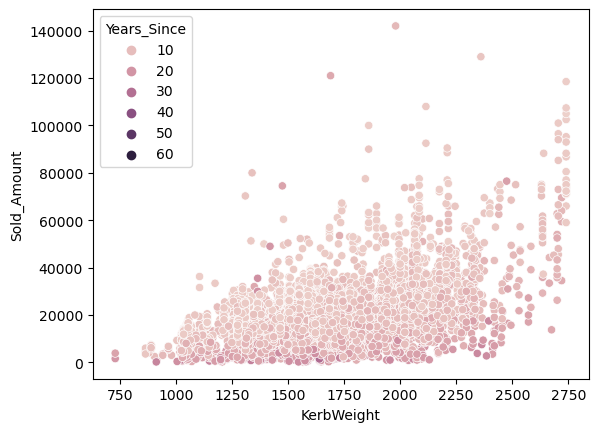

In [9]:
# Older Cars, despite being heavier in terms of kerb weight, still sell for less compared to newer cars of the same kerb weight
sns.scatterplot(data=df_train_clean, x="KerbWeight", y="Sold_Amount", hue="Years_Since")

<AxesSubplot:xlabel='Years_Since', ylabel='Sold_Amount'>

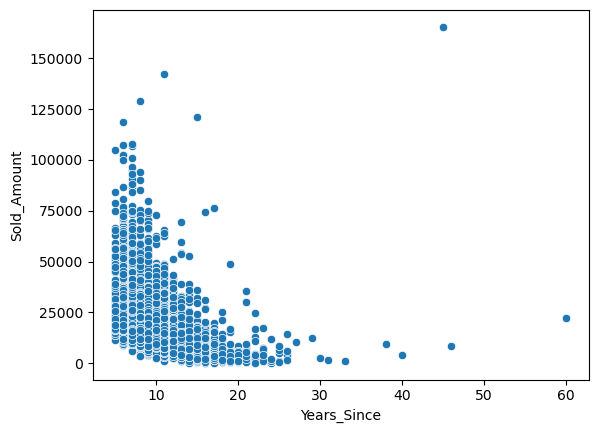

In [10]:
# Older the car, the less value it has
sns.scatterplot(data=df_train_clean, x="Years_Since", y="Sold_Amount")

## Categorical Features
- (X) Make - Can be core predictor as different makes have different prices
- Model - High Cardinality
- Description - description of car, ISSUE - Could use consistent stream of data. Some have "4dr." while others "4dr"
- (X) CurrentRelease - Whether the car is a current release of the model
- ImportFlag - Either L or null, cannot be sure if L means imported or not
- (X) LimitedEdition - Boolean - True is 200 out of 11488. False is 11288 our of 11488
- DriveDescription - How many wheel drive there is 
- (X) DriveCode - ShortHand for full description 
- GearTypeDescription - What gear the vehicle operates on
- GearNum - Number of Gears 
-  DoorNum - Number of Doors, ISSUE - Odd number of doors, why?
- (X) EngineSize - Engine Size, 75% percentile is 2986
-  EngineDescription - Shorthand of EngineSize
-  Cylinders - Number of Cylinders, higher cylinders correlate with higher Sold Value
- (X) FuelTypeDescription - Fuel that it takes in, petrol cars sold for higher price
- FuelCapacity - Fuel Capacity, no correlation, but may be useful when interacts with length width height
- (X) EngineTypeDescription - Rotary Engines seel for half the price on average 
- Sale category - pickles online is sold for the least, while tender takes up the highest values of cars
- Color - High cardinality
- AncapRating - Higher Rating, higher price

'Make', 'CurrentRelease', 'LimitedEdition', 'DriveCode', 'FuelTypeDescription', 'EngineTypeDescription'

In [11]:
df_train_clean['EngineTypeDescription'].value_counts()

Piston               11185
Piston - Electric      300
Rotary                   3
Name: EngineTypeDescription, dtype: int64

In [12]:
df_train_clean[['Sold_Amount', 'EngineTypeDescription']].groupby('EngineTypeDescription').median()

,Sold_Amount
EngineTypeDescription,
Piston,15700.0
Piston - Electric,16700.0
Rotary,6500.0


# Further Data Preprocessing
Once features are selected, continue to perform imputation and feature encoding to ensure that we adrress null values and non numerical attribs before feeding into model

In [13]:
# Create pipeline for categorical data One Hot Encoding


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])

# Pre-process model using imputation and also one hot encoding according to column data type
num_attribs = ['KerbWeight', 'TareMass', 'Torque', 'GrossCombinationMAss', 'YearGroup', 'FuelCapacity', 'GrossVehicleMass',
                  'TowingBrakes', 'EngineSize', 'Height', 'Width', 'Power', 'KM', 'Years_Since']
cat_attribs = ['Make', 'CurrentRelease', 'LimitedEdition', 'DriveCode', 'FuelTypeDescription', 'EngineTypeDescription']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])



In [14]:
# Determining chosen data_columns
chosen_attribs = ['KerbWeight', 'TareMass', 'Torque', 'GrossCombinationMAss', 'YearGroup', 'FuelCapacity', 'GrossVehicleMass',
                  'TowingBrakes', 'EngineSize', 'Height', 'Width', 'Power', 'KM', 'Years_Since',
                 'Make', 'CurrentRelease', 'LimitedEdition', 'DriveCode', 'FuelTypeDescription', 'EngineTypeDescription',
                 'Sold_Amount']
df_train_clean = df_train_clean[chosen_attribs]
df_test_clean = df_test[chosen_attribs]



df_train_transformed = full_pipeline.fit_transform(df_train_clean)
df_test_transformed = full_pipeline.fit_transform(df_test_clean)


In [15]:
df_train_transformed

<11488x76 sparse matrix of type '<class 'numpy.float64'>'
	with 229760 stored elements in Compressed Sparse Row format>

In [16]:
# Define train test sets
X_train = df_train_transformed
y_train = df_train_clean['Sold_Amount']

X_test = df_test_transformed
y_test = df_test_clean['Sold_Amount']

# Training, Validation, Testing

In [34]:
# Run Data cross-validated on training set

# Define model
model = XGBRegressor()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 2175.230 (74.097)


In [35]:
# Running MLFlow script for test data
with mlflow.start_run():

    
    # Fitting training data to the model
    model.fit(X_train, y_train)
    
    # Running prediction on validation dataset
    preds = model.predict(X_test)
    
    # Getting metrics on the validation dataset
    rmse = mean_squared_error(preds, y_test)
    abs_error = mean_absolute_error(preds, y_test)
    r2 = r2_score(preds, y_test)
    
    # Logging params and metrics to MLFlow
    mlflow.log_metric('abs_error', abs_error)
    mlflow.log_metric('r2', r2)

# Diagnosing Regression Models

There are a few ways we can go about diagnosing models at each part of the lifecycle. We have chosen Mean Absolute Error as our performance metric, and we can go about it by checking
- During training, we can use methods such as Feature Importance and also SHAPley explainers to check the impacts of different features on the model.
- The example below contains features that are transformed in such a way that the labels are obscure, with more time and effort, the features can be transformed in such a way that the labels are clear, and we can see the exact impact of individual features on the model. Given beeswarm plots as below, we can see each feature's magnitude and its impact on the model's final predictions

- Given that we reach a reasonable training error ratio, we can then assess error on the test set. Given if the error on the test set is much higher than what we got from training, an overfit has happened and we will need to go back to train a model that is more generalised.

- An error ratio on the test set can also be calculated to show a percentage in error - for rows with high error percentages - a quick analysis can be done to see if its a data anomaly or whether if there is a need to go back to rework a model

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


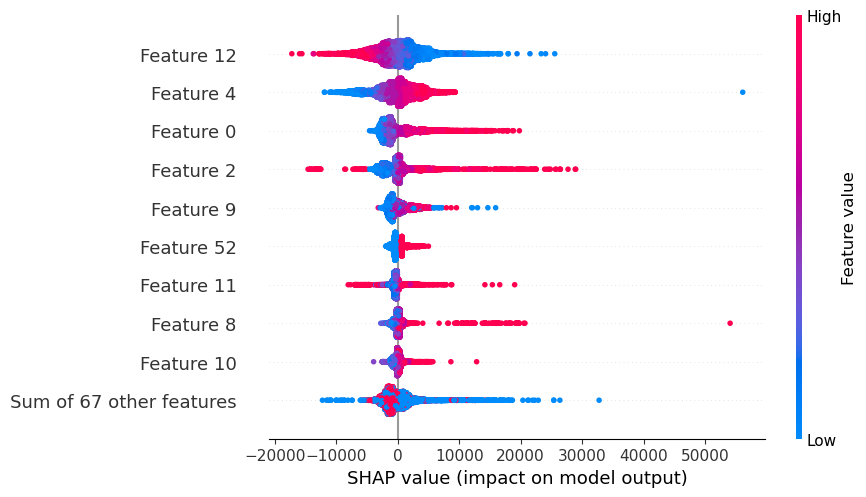

In [19]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

- Different ways of evaluating, multiclass problem? categorize based on deciles